# News Mood Solution
----
## Analysis (written description of observable trends based on the data)
* From the Scatter Plot, we infer that BBC has the fewest negative tweets when compared to the rest of the media outlets.
* From the Bar Graph, 
  - We infer that BBC & CBS have on average tweets with more positive terms whereas CNN, Fox & NYT have on average tweets with negative terms.
  - Of all the five media outlets on twitter, CBS seems to be the most positive whereas NYT seems to be the most negative.
----

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import csv

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target news outlets
target_news_outlets = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# Variables for holding sentiments
sentiments = []

for target in target_news_outlets:
    oldest_tweet = None
    counter = 1
    
    for x in range(5):
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
        
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
        
            oldest_tweet = tweet['id'] - 1
        
            sentiments.append({"Source Account": tweet["user"]["name"],
                               "Text": tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Neutral": neu,
                               "Negative": neg,
                               "Tweets Ago": counter})
        
            counter += 1

In [3]:
# Convert sentiments to .csv
result_file = "sentiments.csv"
with open(result_file, "w", newline='') as csvfile: 
    csvwriter = csv.writer(csvfile, delimiter=",")
    csvwriter.writerow(["Source Account", "Text", "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"])
    for element in sentiments:
        csvwriter.writerow([element["Source Account"], element["Text"], element["Date"], element["Compound"], element["Positive"], element["Neutral"], element["Negative"], element["Tweets Ago"]])
        
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source Account,Text,Tweets Ago
0,0.4215,Sat Sep 29 20:32:03 +0000 2018,0.000,0.743,0.257,BBC,Chile has launched a huge hiking route through...,1
1,0.4215,Sat Sep 29 17:02:12 +0000 2018,0.000,0.865,0.135,BBC,🐣😍 Conservationists have been monitoring the p...,2
2,-0.7003,Sat Sep 29 16:01:07 +0000 2018,0.293,0.707,0.000,BBC,'My children bought back the car I sold to pay...,3
3,0.5499,Sat Sep 29 15:54:38 +0000 2018,0.000,0.871,0.129,BBC,RT @BBCEngland: Benny the beluga whale is spen...,4
4,0.7088,Sat Sep 29 15:02:04 +0000 2018,0.000,0.671,0.329,BBC,Always start by playing paper! 👊✋✌️\n\nThis is...,5


In [14]:
grouped_data = sentiments_pd.groupby(["Source Account"])
#print(grouped_data.count().head())
bbc_tweets = grouped_data.get_group("BBC")
cbs_tweets = grouped_data.get_group("CBS")
cnn_tweets = grouped_data.get_group("CNN")
foxnews_tweets = grouped_data.get_group("Fox News")
nytimes_tweets = grouped_data.get_group("The New York Times")

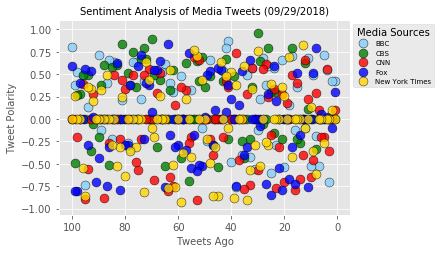

In [69]:
# Create plot
bbc = plt.scatter(bbc_tweets["Tweets Ago"], bbc_tweets["Compound"], alpha=0.8, facecolors="lightskyblue", edgecolors="black", s=80, label="BBC")
cbs = plt.scatter(cbs_tweets["Tweets Ago"], cbs_tweets["Compound"], alpha=0.8, facecolors="green", edgecolors="black", s=80, label="CBS")
cnn = plt.scatter(cnn_tweets["Tweets Ago"], cnn_tweets["Compound"], alpha=0.8, facecolors="red", edgecolors="black", s=80, label="CNN")
foxnews = plt.scatter(foxnews_tweets["Tweets Ago"], foxnews_tweets["Compound"], alpha=0.8, facecolors="blue", edgecolors="black", s=80, label="Fox")
nytimes = plt.scatter(nytimes_tweets["Tweets Ago"], nytimes_tweets["Compound"], alpha=0.8, facecolors="gold", edgecolors="black", s=80, label="New York Times")

legend = plt.legend(handles=[bbc, cbs, cnn, foxnews, nytimes], loc='upper right', bbox_to_anchor=(1.3, 1), title="Media Sources", fontsize=7)
for handle in legend.legendHandles:
    handle.set_sizes([80])

plt.grid(True)
plt.subplots_adjust(top=0.8, right=0.8)
plt.title("Sentiment Analysis of Media Tweets (09/29/2018)", fontsize=10)
plt.xlabel("Tweets Ago", fontsize=10)
plt.ylabel("Tweet Polarity", fontsize=10)
plt.xlim(105, -5)
plt.savefig("ScatterPlot_SentimentAnalysisofMediaTweets.png", dpi=120)
plt.show()

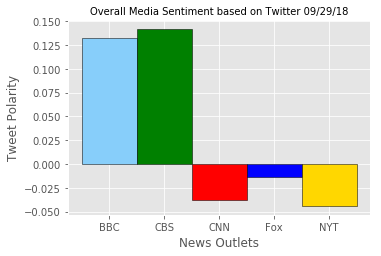

In [81]:
news_outlets = ["BBC", "CBS", "CNN", "Fox", "NYT"]
tweet_polarity = grouped_data["Compound"].mean()
plt.bar(news_outlets, tweet_polarity, color=["lightskyblue", "green", "red", "blue", "gold"], edgecolor="black", align="center", width=1)
plt.title("Overall Media Sentiment based on Twitter 09/29/18", fontsize=10)
plt.xlabel("News Outlets")
plt.ylabel("Tweet Polarity")
plt.subplots_adjust(top=0.8, left=0.2)
plt.savefig("BarChart_MediaSentiment.png", dpi=120)
plt.show()